In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [44]:
import matplotlib.image as mpimg
import pandas as pd
object_tbl = pd.read_csv("../web-app/ADE20K_data_info/object.csv")
object_location = pd.read_csv("../web-app/ADE20K_data_info/object_location.csv")
img_table = pd.read_csv("../web-app/ADE20K_data_info/image.csv")

def get_ground_truth_tiles_from_img(objid,PLOT=False):
    imgid = object_tbl[object_tbl["id"]==objid]["image_id"].values[0]
    imgname = img_table[img_table.id == imgid].filename.values[0]
    img = mpimg.imread("../ADE20K_data/"+imgname+"_seg.png")
    # plt.imshow(img)
    # plt.imshow(mask)
    x_loc,y_loc= object_location[object_location["object_id"]==objid][["x_loc","y_loc"]].values[0]
    #print "object name:", object_tbl[object_tbl["id"]==objid]["name"].values[0]
    gt_xloc,gt_yloc = y_loc,x_loc
    r, g, b = img[gt_xloc,gt_yloc, 0], img[gt_xloc,gt_yloc, 1], img[gt_xloc,gt_yloc, 2]
    idx = np.where((img[:, :, 0] == r) & (img[:, :, 1] == g) & (img[:, :, 2] == b))
    gt_tile = zip(*idx)
    if PLOT:
        plt.figure()
        x,y= zip(*gt_tile)
        plt.title(object_tbl[object_tbl["id"]==objid]["name"].values[0])
        plt.imshow(img)
        plt.plot(gt_yloc,gt_xloc,'x')
        plot_coords(y,x)
    return img,gt_tile

In [25]:
# mask, tiles = get_tiles_from_img(img)

In [26]:
# gt_tile = get_ground_truth_tiles_from_img(img,x_loc,y_loc)

In [27]:
def plot_coords(x,y, color='red', linestyle='-', fill_color="", show=False, invert_y=False):
    plt.plot(x, y, linestyle, color=color, zorder=1)
    if fill_color != "":
        plt.fill_between(x, y, facecolor=fill_color, color='none', alpha=0.5)
    if invert_y:
        plt.gca().invert_yaxis()

In [28]:
# tiles[1][:,1]

object name: telephone


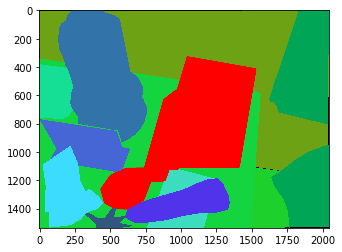

In [31]:
img,gt_tile = get_ground_truth_tiles_from_img(1)

x,y= zip(*gt_tile)
plt.imshow(img)
plot_coords(y,x)
# plt.plot(gt_yloc,gt_xloc,'o')
# plot_coords(y,x,invert_y=True)
# plt.plot(x_loc,y_loc,'o')

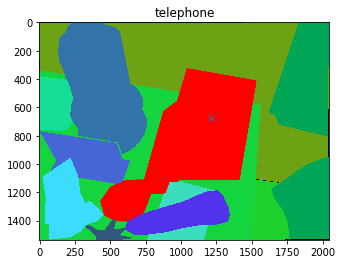

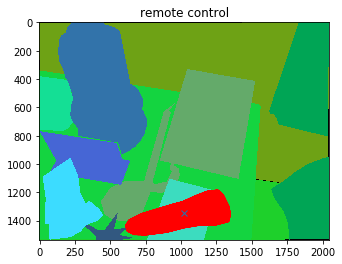

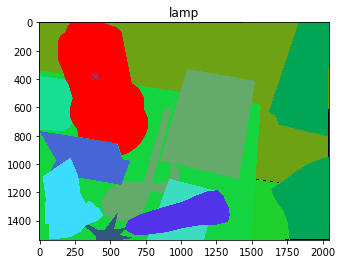

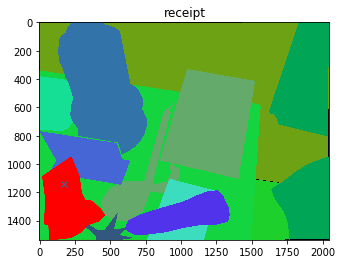

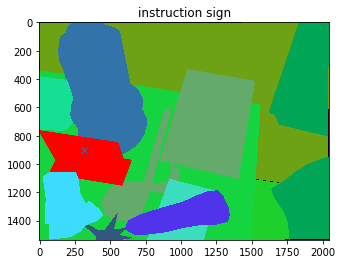

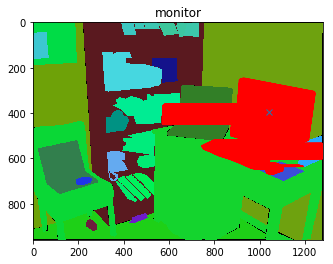

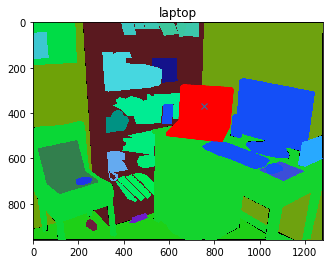

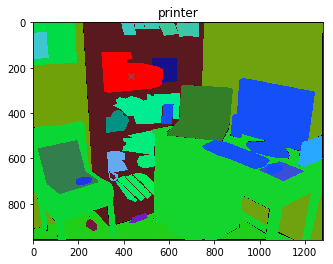

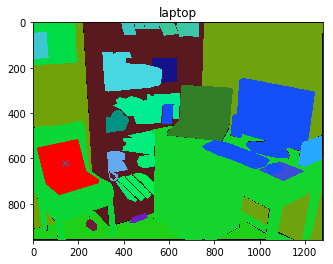

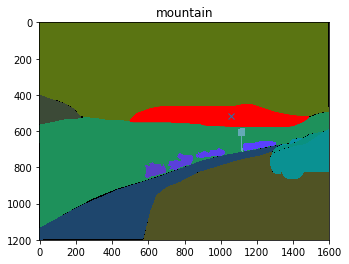

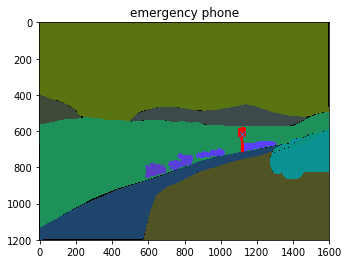

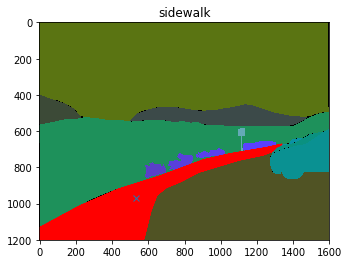

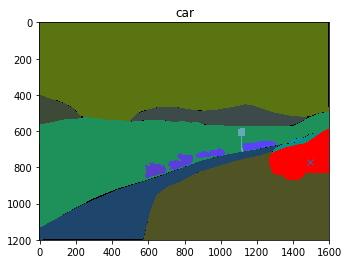

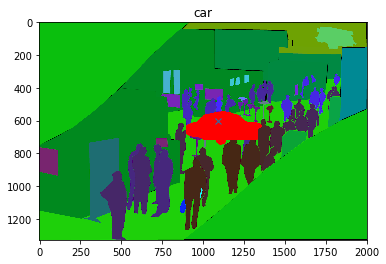

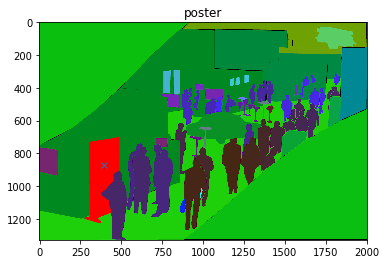

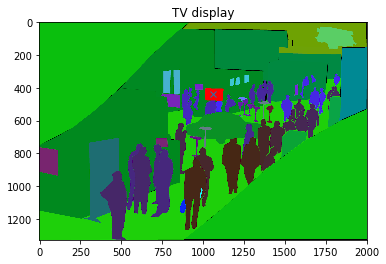

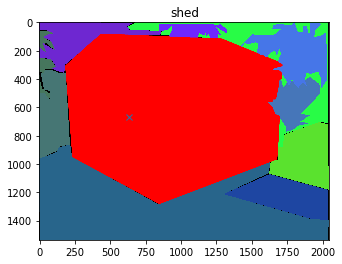

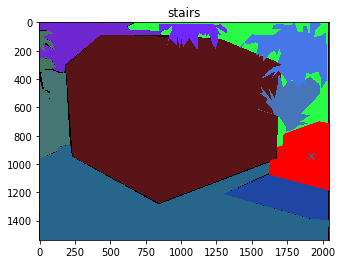

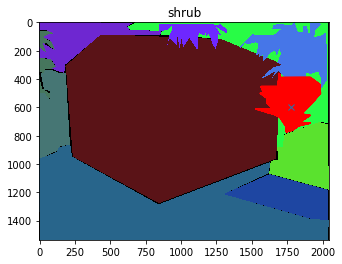

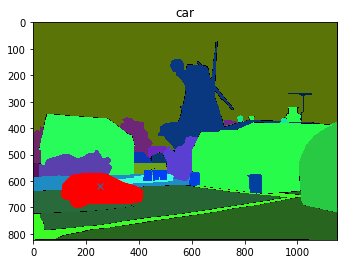

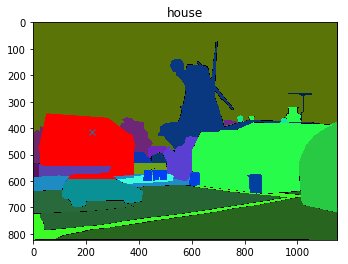

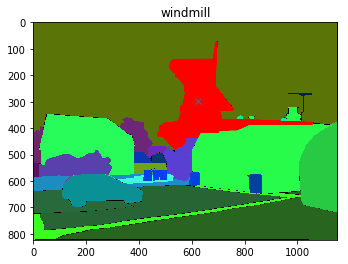

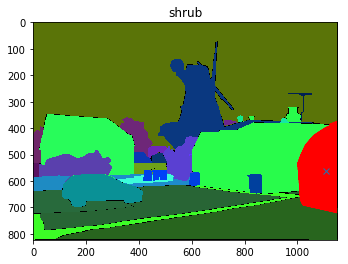

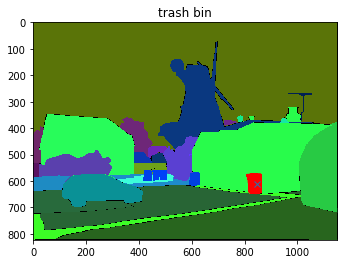

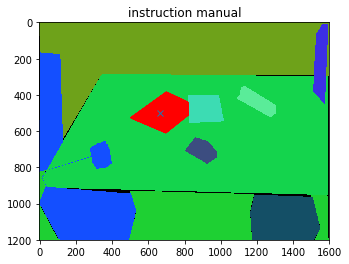

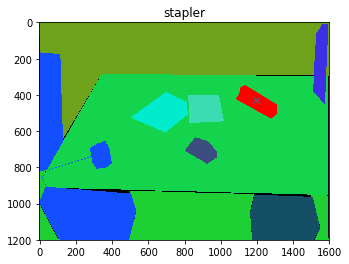

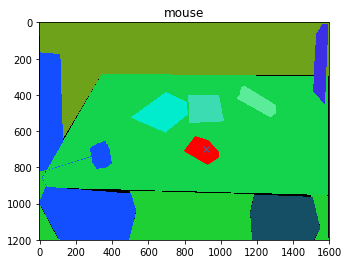

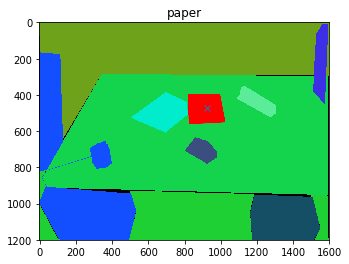

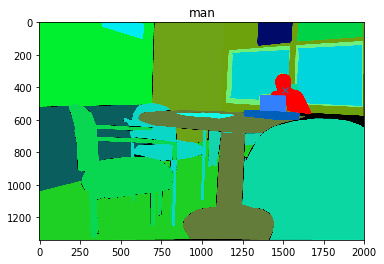

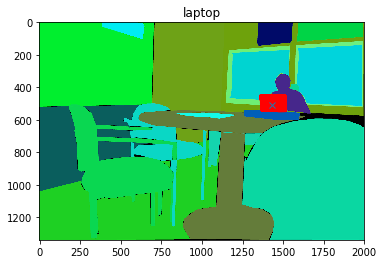

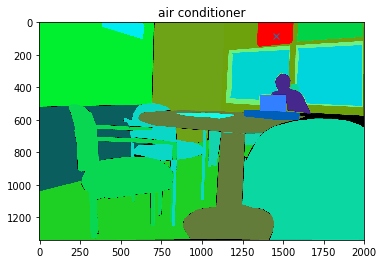

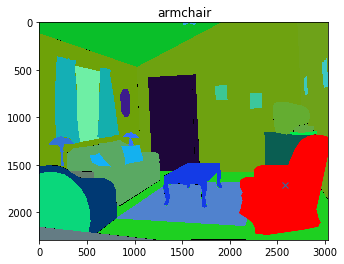

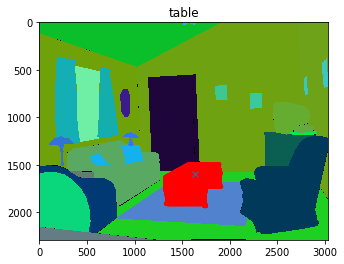

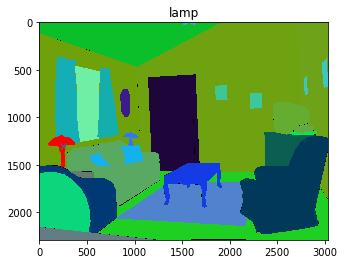

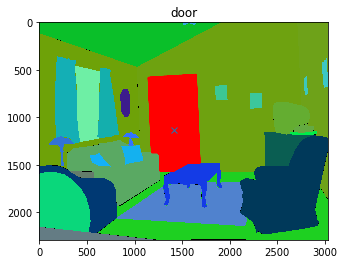

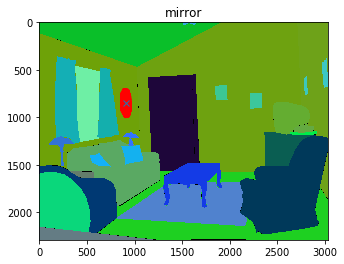

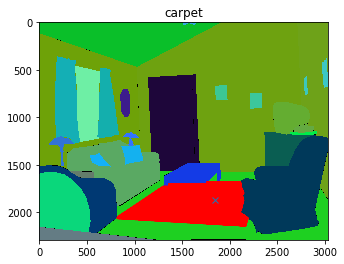

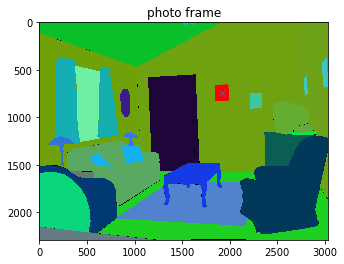

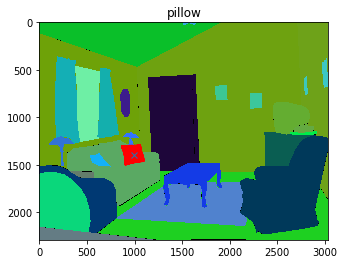

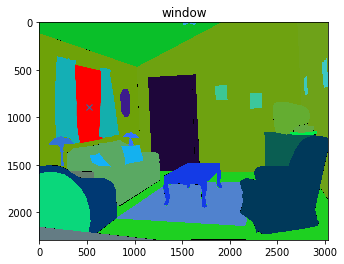

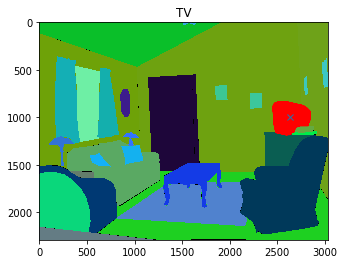

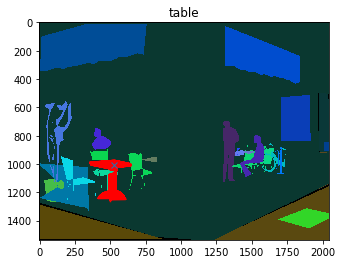

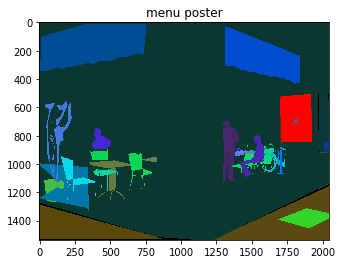

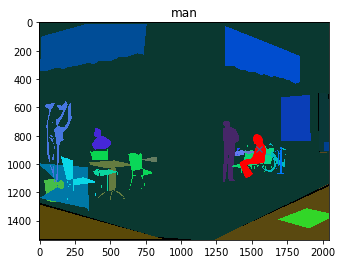

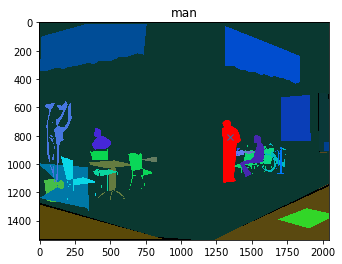

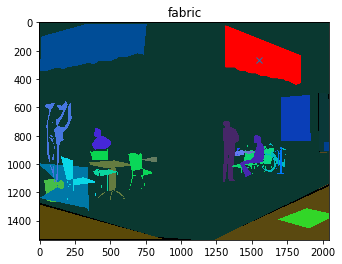

In [46]:
df_info =[]
for objid in list(object_tbl.id):
    img,gt_tile = get_ground_truth_tiles_from_img(objid,PLOT=True)
    xlocs,ylocs= zip(*gt_tile)
    df_info.append([objid,str(list(xlocs)),str(list(ylocs))])

In [50]:
ground_truth_df = pd.DataFrame(df_info)

In [52]:
ground_truth_df.columns = ['object_id',"x_locs","y_locs"]

In [54]:
ground_truth_df.to_csv("../ADE20K_data/ground_truth.csv",index=None)